In [28]:
# Data processing  
# -----------------------------------------------------------------------  
import numpy as np
import pandas as pd  

# Other objectives  
# -----------------------------------------------------------------------  
import math  

# Graphics  
# -----------------------------------------------------------------------  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 


# Custom functions
# -----------------------------------------------------------------------
from src.support_eda import plot_categoric_distribution, plot_correlation_matrix, plot_numeric_distribution, plot_relation_tv_numeric, plot_outliers  

In [76]:
df = pd.read_csv('../data/raw/api_rent_madrid.csv', delimiter=';')

In [77]:
df.head()

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",...,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,...,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.0,penthouse,rent,67.0,True,2,2,Calle Madrid,...,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.0,flat,rent,89.0,False,2,1,Calle Arroyo,...,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


In [78]:
df.duplicated().sum()

8

In [79]:
df.drop_duplicates(inplace=True)

### Main Columns

- **`propertyCode`**: Unique code identifying each property.

- **`price`**: Property price in euros (target variable).

- **`propertyType`**: Type of property (e.g., apartment, penthouse, chalet, etc.).

- **`size`**: Size of the property in square meters.

- **`rooms`**: Number of rooms.

- **`bathrooms`**: Number of bathrooms.

- **`district`**: District where the property is located (e.g., Centro, Hortaleza).

- **`neighborhood`**: Neighborhood within the district (less complete data compared to `district`).

- **`latitude`** and **`longitude`**: Geographic coordinates of the property.

- **`address`**: Approximate or descriptive address of the property.

### Additional Attributes

- **`numPhotos`**: Number of photos available for the property.

- **`exterior`**: Boolean indicator showing if the property is exterior-facing (`True` or `False`).

- **`hasLift`**: Indicates if the property has an elevator (`True` or `False`, with some null values).

- **`parkingSpace`**: Information about parking space (detailed in JSON format in some rows).

- **`priceByArea`**: Price per square meter in euros.

- **`floor`**: Floor where the property is located (e.g., ground floor, 1st floor, penthouse).

- **`description`**: Textual description of the property.

### Listing Features Columns

- **`hasVideo`**: Indicates if the listing includes a video (`True` or `False`).

- **`has3DTour`**: Indicates if the listing has a 3D tour available.

- **`newDevelopment`**: Boolean indicating if the property is a new development.

- **`superTopHighlight`** and **`topNewDevelopment`**: Boolean indicators of the prominence or highlight status of the listing on the platform.

### Less Complete Features

- **`neighborhood`** and **`district`**: Although important, these contain null values and may require cleaning.

- **`parkingSpace`** and **`labels`**: Information limited to a few properties.

- **`newDevelopmentFinished`**: Only available for specific properties, with low representation.

In [69]:
def quick_plot_numeric(df, col, num=10, size=(10,5), rotation=45):

    max_ = df[col].max()
    min_ = df[col].min()
    n = (max_ - min_) // num

    if n < 2:
        return
    
    plot_numeric_distribution(df, min_, max_, col, n, size=size, rotation=rotation)

In [80]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
propertyCode,442.0,94573262.11,13974749.91,666696.0,97550391.50,98662647.0,98894324.25,98939685.0
numPhotos,442.0,21.85,9.66,0.0,15.00,21.0,28.00,72.0
price,442.0,672.96,83.96,340.0,645.00,700.0,740.00,750.0
size,442.0,67.96,35.87,20.0,46.25,62.0,80.00,371.0
rooms,442.0,1.70,0.98,0.0,1.00,2.0,2.00,6.0
bathrooms,442.0,1.21,0.44,1.0,1.00,1.0,1.00,3.0
distance,442.0,22266.39,16991.27,183.0,7089.00,20001.0,34854.75,59919.0
priceByArea,424.0,11.95,5.37,1.0,8.00,11.0,15.00,33.0


In [81]:
df['price'].isna().value_counts()

price
False    442
Name: count, dtype: int64

No hay nigún valor nulo en la variable objetivo, por lo que todo guay

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 449
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            442 non-null    int64  
 1   numPhotos               442 non-null    int64  
 2   price                   442 non-null    float64
 3   propertyType            442 non-null    object 
 4   operation               442 non-null    object 
 5   size                    442 non-null    float64
 6   exterior                442 non-null    bool   
 7   rooms                   442 non-null    int64  
 8   bathrooms               442 non-null    int64  
 9   address                 442 non-null    object 
 10  province                442 non-null    object 
 11  municipality            442 non-null    object 
 12  country                 442 non-null    object 
 13  latitude                442 non-null    object 
 14  longitude               442 non-null    object 

## Main columns

### **`propertyCode`**

Unique code identifying each property.

In [89]:
print(f"There are a total of {df['propertyCode'].unique().shape[0]} different property codes out of {df.shape[0]} entries")

There are a total of 442 different property codes out of 442 entries


`propertyCode` es un buen identificador para cada vivienda ya que no tiene repetidos. El eliminado de duplicados ha funcionado adecuadamente.

In [87]:
df['propertyCode'].unique().shape[0]

442

### **`price`**

Property price in euros (target variable).

In [101]:
df['price'].describe().round(2)

count    442.00
mean     672.96
std       83.96
min      340.00
25%      645.00
50%      700.00
75%      740.00
max      750.00
Name: price, dtype: float64

El precio más alto es de 750 euros con una media de ~673 euros y mediana de 700. Es decir, la mayoría de los datos se encuentran en este rango de 700-750 euros. 

La desviación típica es de ~84 euros. Lo que indica que existe cierta dispersión en los datos, principalmente dada por los valores má bajos ya que el mínimo llega hasta 340.

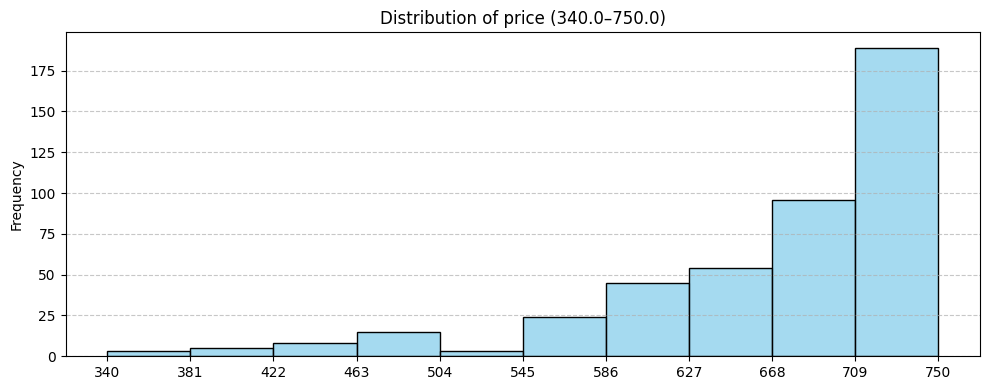

In [98]:
min_ = df['price'].min()
max_ = df['price'].max()

plot_numeric_distribution(df, min_, max_, 'price', n = 41, size=(10,4), rotation=0)

Vemos por tanto que los precios están agrupados principalmente hacia los valores más altos con una cola hacia la izquierda relativamente prolongada. Este límite superior en el precio sugiere la aplicación de algún tipo de filtro de selección previo o, menos probablemente, la aplicación de alguna política de límites abusivos contra el mercado especulativo de la vivienda.

### **`propertyType`**

Type of property (e.g., apartment, penthouse, chalet, etc.).

In [108]:
df['propertyType'].value_counts()

propertyType
flat            348
studio           48
duplex           19
penthouse        16
chalet            9
countryHouse      2
Name: count, dtype: int64

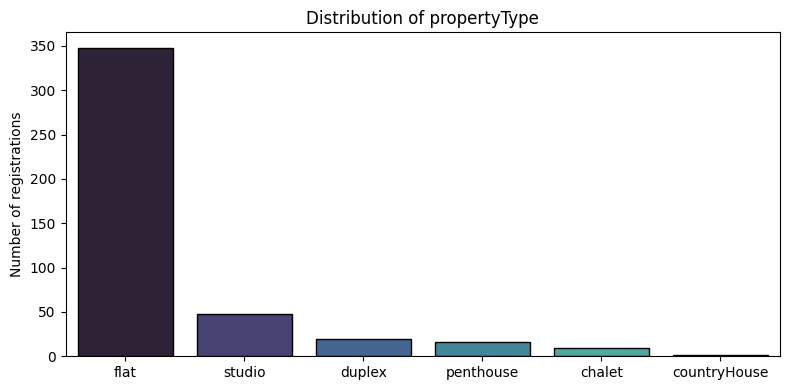

In [107]:
plot_categoric_distribution(df, 'propertyType', rotation=0)

La mayoría de propiedades son `flat`, lo cual tiene sentido al tratarse de una gran ciudad como Madrid. La siguiente categoría son `studio` que se tratan de propiedades que no tienen habitaciones y constan de una estancia única.

El resto de tipos de propiedades son muy poco frecuentes pero pueden ser representativas para el análisis.

¿Son los `studio` equivalentes a cero habitaciones?

Aparentemente sí, pero vamos a verlo.

In [128]:
df[(df['propertyType'] != 'studio') & (df['rooms'] == 0)]

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
241,88875520,15,750.0,penthouse,rent,80.0,True,0,1,Zona Industrial,...,False,False,3248-16907,1,Zona Industrial,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


In [129]:
df[(df['propertyType'] == 'studio') & (df['rooms'] != 0)]

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished


No hay ningún `studio` que no tenga 0 habitaciones, lo que es coherente con la definición de `studio`. Sin embargo, sí hay una vivienda que tiene 0 habitaciones y no es `studio` sino `penthouse`. Esto sí es posible ya que un `penthouse` puede tener 0 habitaciones pero al establecer la categoría no se han podido seleccionar ambas de forma simultánea.

### **`size`**

Size of the property in square meters.

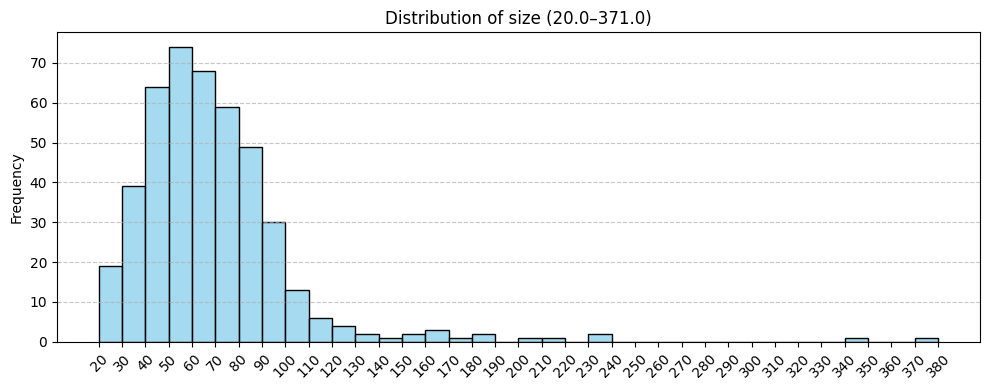

In [143]:
min_ = df['size'].min()
max_ = df['size'].max()

plot_numeric_distribution(df, min_, max_, 'size', n = 10, size=(10,4))

La mayoría de viviendas tienen un tamaño relativamente pequeño, entre 20 y 100 con una distribución aparentemente normal pero con una larga cola a la derecha que posiblemente representen casas más espaciosas a las afueras de la ciudad.

### **`rooms`**

Number of rooms.

In [147]:
df['rooms'].value_counts()

rooms
2    171
1    135
3     77
0     49
4      9
6      1
Name: count, dtype: int64

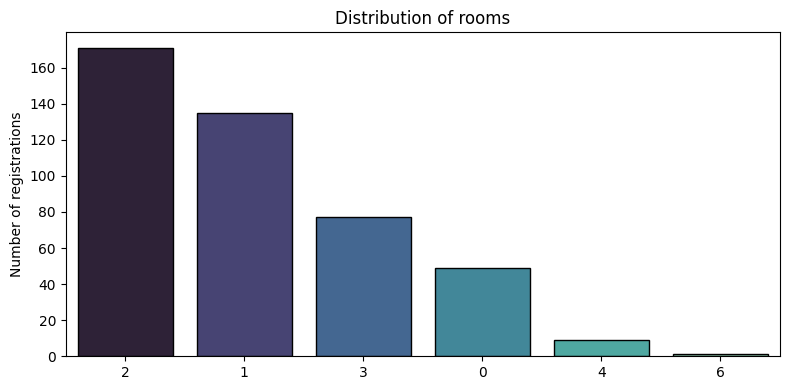

In [146]:
plot_categoric_distribution(df, 'rooms', size = (8, 4), rotation=0)

La gran mayoría de viviendas tienen entre 1 y 3 habitaciones, que es lo más habitual para viviendas para familias pequeñas, parejas o para una sola persona. Existen también algunas que no tienen habitaciones, como hemos comentado anteriormente.

---

### Main Columns

- **`rooms`**: Number of rooms.

- **`bathrooms`**: Number of bathrooms.

- **`district`**: District where the property is located (e.g., Centro, Hortaleza).

- **`neighborhood`**: Neighborhood within the district (less complete data compared to `district`).

- **`latitude`** and **`longitude`**: Geographic coordinates of the property.

- **`address`**: Approximate or descriptive address of the property.

### Additional Attributes

- **`numPhotos`**: Number of photos available for the property.

- **`exterior`**: Boolean indicator showing if the property is exterior-facing (`True` or `False`).

- **`hasLift`**: Indicates if the property has an elevator (`True` or `False`, with some null values).

- **`parkingSpace`**: Information about parking space (detailed in JSON format in some rows).

- **`priceByArea`**: Price per square meter in euros.

- **`floor`**: Floor where the property is located (e.g., ground floor, 1st floor, penthouse).

- **`description`**: Textual description of the property.

### Listing Features Columns

- **`hasVideo`**: Indicates if the listing includes a video (`True` or `False`).

- **`has3DTour`**: Indicates if the listing has a 3D tour available.

- **`newDevelopment`**: Boolean indicating if the property is a new development.

- **`superTopHighlight`** and **`topNewDevelopment`**: Boolean indicators of the prominence or highlight status of the listing on the platform.

### Less Complete Features

- **`neighborhood`** and **`district`**: Although important, these contain null values and may require cleaning.

- **`parkingSpace`** and **`labels`**: Information limited to a few properties.

- **`newDevelopmentFinished`**: Only available for specific properties, with low representation.